**1.] Data Preprocessing**

Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


Importing the training Dataset

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')

In [3]:
training_set = dataset_train.iloc[:, 1:2].values

Feature Scaling

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))

In [5]:
training_set_scaled = sc.fit_transform(training_set)

Creating a data structure with 60 timesteps and single output

In [6]:
X_train = []
y_train = []

for i in range(60,1258):
  X_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])
X_train , y_train = np.array(X_train) , np.array(y_train)

Reshaping 

In [7]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

**2.]Building the RNN**

Importing the keras libraries and packages

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Initializing the RNN

In [9]:
regressor = Sequential()

Adding the first LSTM layer and some Dropout regularisation


In [10]:
regressor.add(LSTM(units=55,return_sequences=True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.25))

Adding the second LSTM layer and some Dropout regularisation


In [11]:
regressor.add(LSTM(units=55,return_sequences=True))
regressor.add(Dropout(0.25))

Adding the third LSTM layer and some Dropout regularisation


In [12]:
regressor.add(LSTM(units=55,return_sequences=True))
regressor.add(Dropout(0.25))

Adding the fourth LSTM layer and some Dropout regularisation


In [13]:
regressor.add(LSTM(units=55))
regressor.add(Dropout(0.25))

Adding the Output Layer

In [14]:
regressor.add(Dense(units=1))

Compiling the RNN

In [15]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

Fitting the RNN to the Training set

In [16]:
regressor.fit(X_train,y_train,epochs = 100, batch_size = 36)

Epoch 1/100
34/34 [==============================] - 2s 54ms/step - loss: 0.0494
Epoch 2/100
34/34 [==============================] - 2s 57ms/step - loss: 0.0081
Epoch 3/100
34/34 [==============================] - 2s 56ms/step - loss: 0.0071
Epoch 4/100
34/34 [==============================] - 2s 57ms/step - loss: 0.0062
Epoch 5/100
34/34 [==============================] - 2s 56ms/step - loss: 0.0061
Epoch 6/100
34/34 [==============================] - 2s 57ms/step - loss: 0.0055
Epoch 7/100
34/34 [==============================] - 2s 56ms/step - loss: 0.0055
Epoch 8/100
34/34 [==============================] - 2s 56ms/step - loss: 0.0062
Epoch 9/100
34/34 [==============================] - 2s 56ms/step - loss: 0.0051
Epoch 10/100
34/34 [==============================] - 2s 55ms/step - loss: 0.0047
Epoch 11/100
34/34 [==============================] - 2s 55ms/step - loss: 0.0049
Epoch 12/100
34/34 [==============================] - 2s 56ms/step - loss: 0.0049
Epoch 13/100
34/34 [=====

**3.] Making predicitions and visualizing the results**

Getting the real stock price

In [17]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:,1:2]

Getting the predicted stock price of 2017

In [18]:
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total)-len(dataset_test) - 60: ].values

In [19]:
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [20]:
X_test = []

for i in range(60,80):
  X_test.append(inputs[i-60:i,0])
X_test= np.array(X_test)

In [21]:
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
Predicted_stock_price = regressor.predict(X_test)


In [22]:
predicted_stock_price = sc.inverse_transform(Predicted_stock_price)

**Visualizing the Results**

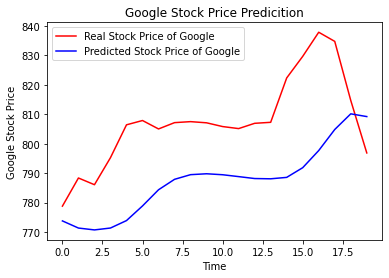

In [24]:
plt.plot(real_stock_price,color = 'red',label = 'Real Stock Price of Google')
plt.plot(predicted_stock_price,color = 'blue',label = 'Predicted Stock Price of Google')
plt.title('Google Stock Price Predicition')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()